In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.wordnet import WordNetLemmatizer

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
def create_wordcloud(words):
    wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

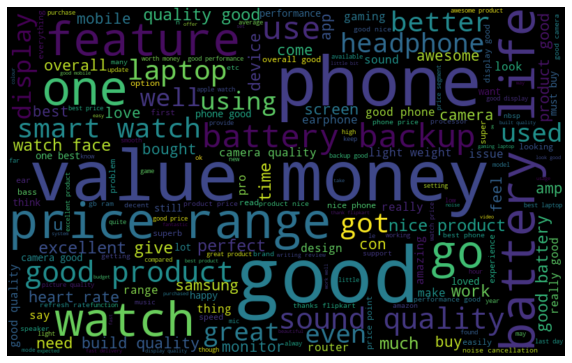

In [39]:
subset=df[df.Ratings=='5']
text=subset.Review_text123.values
words=' '.join(text)
create_wordcloud(words)

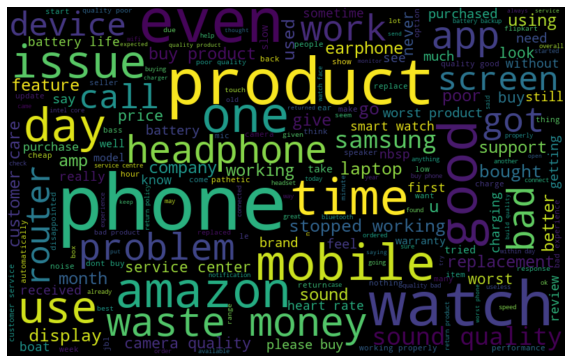

In [40]:
subset=df[df.Ratings=='1']
text=subset.Review_text123.values
words=' '.join(text)
create_wordcloud(words)

In [4]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\Rating_prediction.csv(1)")

In [5]:
df.drop(['Unnamed: 0'],axis=1)

,Review_title,Review_text,Ratings
0,Suitable for School kids,\n If you are a College student or a professi...,2.0 out of 5 stars
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2.0 out of 5 stars
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2.0 out of 5 stars
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2.0 out of 5 stars
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2.0 out of 5 stars
...,...,...,...
77545,Nice product,good product,4
77546,Awesome,Very good as expected and happy with the purchase,5
77547,Awesome,I love it! No complaint!,5
77548,Nice product,good product,4


In [6]:
df=df.dropna()

In [7]:
def clean(text):
    a=str(text)
    text=a.replace(".0 out of 5 stars",'')
    return text

In [8]:
df['Ratings']=df['Ratings'].apply(clean)

In [9]:
df['Ratings'].value_counts()

5    27200
4    14002
1    10442
3     9191
2     7459
Name: Ratings, dtype: int64

In [9]:
df.sample(20)

,Unnamed: 0,Review_title,Review_text,Ratings,Review_text123
50162,50162,Just wow!,Used for one month...It's a delicate laptop fo...,5,used one month delicate laptop students office...
43703,43703,Good worth,\n Good\n,5,good
40616,40616,Super watch.... 100% Value for money,\n Accuracy.... And 100% value for money\n,5,accuracy value money
64797,64797,Super!,Value for money\nOsm.camera and selfie\nAnd be...,5,value money osm camera selfie best gaming proccer
61989,61989,Perfect product!,I am happy very very nice phone,5,happy nice phone
72744,72744,Nice product,I like it very much but the screen size is so ...,4,like much screen size small
37292,37292,Doubtful Quality,\n My first watch gave improper touch behavio...,2,first watch gave improper touch behaviours som...
3716,3716,"Nice colour, good product","\n Very good product, nice looking,super\n",5,good product nice looking super
41307,41307,affordable small camera .........but,\n In fact let me confess that I have been us...,3,fact let confess using sorts cameras point sho...
70592,70592,Value-for-money,Writing this review after 6 days of use. -1 st...,4,writing review days use star delayed delivery ...


In [12]:
lemm=WordNetLemmatizer()

In [13]:
def process_text(text):
    text=str(text)
    text=re.sub(r'\d+','-',text)
    text=text.lower().replace('\n',' ').replace('\r',' ').replace('   ','').replace('<br>','').strip()
    text=re.sub(r' +',' ',text)
    
    text=re.sub('[^\w\s]',' ',text)
    stop_words=set(stopwords.words("english"))
    words_tokens=word_tokenize(text)
    filtered_text=[word for word in words_tokens if word not in string.punctuation]
    filtered_text=[word for word in filtered_text if word not in stop_words]
    filtered_text=[lemm.lemmatize(word) for word in filtered_text]
    text=' '.join(filtered_text)
    return text

In [14]:
df['Review_text123']=df['Review_text'].apply(process_text)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(df['Review_text123'],df['Ratings'],test_size=0.25,random_state=10)

In [17]:
X_train.shape

(51220,)

In [138]:
X_test.shape

(13659,)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
ngrams_range=(1,2)
min_df=10
max_df=1.
max_features=350

In [20]:
tfdif=TfidfVectorizer(encoding='utf-8',
                     ngram_range=ngrams_range,stop_words=None,lowercase=False,max_df=max_df,
                      min_df=min_df,max_features=max_features,norm='l2',sublinear_tf=True)

features_train=tfdif.fit_transform(X_train).toarray()
labels_train=y_train

features_test=tfdif.transform(X_test).toarray()
labels_test=y_test

In [17]:
labels_test.shape

(13659,)

In [149]:
features_test.shape

(13659, 300)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(features_train,labels_train)
model_predictions=model.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_predictions))
print(classification_report(labels_test,model_predictions))

Accuracy 0.7135996251610636
              precision    recall  f1-score   support

           1       0.68      0.81      0.74      2579
           2       0.69      0.47      0.56      1852
           3       0.70      0.51      0.59      2332
           4       0.69      0.53      0.60      3471
           5       0.74      0.91      0.81      6840

    accuracy                           0.71     17074
   macro avg       0.70      0.65      0.66     17074
weighted avg       0.71      0.71      0.70     17074



In [63]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(features_train,labels_train)
model3_predictions=model3.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model3_predictions))
print(classification_report(labels_test,model3_predictions))

Accuracy 0.5526026795519438
              precision    recall  f1-score   support

           1       0.55      0.72      0.62      2058
           2       0.35      0.18      0.24      1541
           3       0.36      0.25      0.29      1877
           4       0.42      0.25      0.31      2773
           5       0.64      0.86      0.73      5410

    accuracy                           0.55     13659
   macro avg       0.46      0.45      0.44     13659
weighted avg       0.51      0.55      0.52     13659



In [64]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(features_train,labels_train)
model2_predictions=model2.predict(features_test)
print('Accuracy2',accuracy_score(labels_test,model2_predictions))
print(classification_report(labels_test,model2_predictions))

Accuracy2 0.678014495936745
              precision    recall  f1-score   support

           1       0.68      0.69      0.69      2058
           2       0.58      0.53      0.55      1541
           3       0.58      0.50      0.54      1877
           4       0.63      0.56      0.59      2773
           5       0.75      0.84      0.79      5410

    accuracy                           0.68     13659
   macro avg       0.64      0.62      0.63     13659
weighted avg       0.67      0.68      0.67     13659



In [65]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
model4.fit(features_train,labels_train)
model4_predictions=model4.predict(features_test)
print('Accuracy4',accuracy_score(labels_test,model4_predictions))
print(classification_report(labels_test,model4_predictions))

Accuracy4 0.535031847133758
              precision    recall  f1-score   support

           1       0.51      0.56      0.53      2058
           2       0.36      0.33      0.34      1541
           3       0.44      0.30      0.35      1877
           4       0.48      0.33      0.39      2773
           5       0.61      0.77      0.68      5410

    accuracy                           0.54     13659
   macro avg       0.48      0.46      0.46     13659
weighted avg       0.52      0.54      0.52     13659



In [66]:
from sklearn.naive_bayes import MultinomialNB
model5=MultinomialNB()
model5.fit(features_train,labels_train)
model5_predictions=model5.predict(features_test)
print('Accuracy4',accuracy_score(labels_test,model5_predictions))
print(classification_report(labels_test,model5_predictions))

Accuracy4 0.5326890694779999
              precision    recall  f1-score   support

           1       0.54      0.69      0.61      2058
           2       0.37      0.07      0.12      1541
           3       0.37      0.19      0.25      1877
           4       0.40      0.18      0.24      2773
           5       0.57      0.91      0.70      5410

    accuracy                           0.53     13659
   macro avg       0.45      0.41      0.38     13659
weighted avg       0.48      0.53      0.47     13659



In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameter={'n_estimators':[100,200,350],'max_depth':range(5,35,5),
          'criterion':['gini','entropy'],
           'min_samples_split':[2,5,10,15,100]}
GCV2=GridSearchCV(model,parameter,cv=2,verbose=2,scoring='accuracy',n_jobs=-1)
GCV2.fit(features_train,labels_train)
GCV2.best_params_

Fitting 2 folds for each of 150 candidates, totalling 300 fits


{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_split': 2,
 'n_estimators': 200}

In [28]:
final_mod=RandomForestClassifier(criterion='entropy',max_depth=25,min_samples_split=2, n_estimators=200)
final_mod.fit(features_train,labels_train)
pred=final_mod.predict(features_test)
acc1=accuracy_score(labels_test,pred)
print(acc1)
print(classification_report(labels_test,pred))

0.6252782007731053
              precision    recall  f1-score   support

           1       0.63      0.75      0.68      2579
           2       0.90      0.23      0.37      1852
           3       0.81      0.27      0.41      2332
           4       0.78      0.30      0.44      3471
           5       0.58      0.97      0.73      6840

    accuracy                           0.63     17074
   macro avg       0.74      0.50      0.52     17074
weighted avg       0.70      0.63      0.58     17074



In [25]:
modelf=DecisionTreeClassifier(criterion='entropy',max_depth=25,min_samples_split=2)
modelf.fit(features_train,labels_train)
modelf_predictions=modelf.predict(features_test)
print('Accuracy2',accuracy_score(labels_test,modelf_predictions))
print(classification_report(labels_test,modelf_predictions))

Accuracy2 0.5585685838116434
              precision    recall  f1-score   support

           1       0.59      0.61      0.60      2579
           2       0.50      0.17      0.26      1852
           3       0.39      0.32      0.35      2332
           4       0.54      0.33      0.41      3471
           5       0.59      0.84      0.70      6840

    accuracy                           0.56     17074
   macro avg       0.52      0.45      0.46     17074
weighted avg       0.54      0.56      0.53     17074



In [100]:
final_mod.predict(features_test[1:15])

array(['5', '5', '1', '1', '4', '5', '3', '5', '4', '3', '5', '5', '5',
       '3'], dtype=object)

In [101]:
labels_test[1:15]

34689    5
60905    5
37625    1
48636    3
38383    4
75850    5
50149    1
60867    5
35957    4
61330    3
25520    4
61308    4
855      5
37415    3
Name: Ratings, dtype: object

In [26]:
import joblib

In [29]:
joblib.dump(final_mod,'reviews.obj')

['reviews.obj']